# **Introduction to A/B Testing Using The P-Value Method**

Estimated time needed: **30** minutes

You are a project manager at a company. Two years ago, your team launched a new website blog that is only available a light mode. Last week, while you were reading your e-book, you noticed that you switched it to dark mode right after you downloaded the e-book reading app. 

You start contemplating whether your company's website blog should also feature a dark mode, but you are not sure if this would actually be worth doing. You're wondering if readers avoid subscribing due to eye discomfort while reading your blog. In this lab, you will be working with Python and be introduced to A/B Testing and use this method to see if more readers/users would actually convert to this website blog if you made that available in dark mode.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX022OEN/Screenshot%202024-01-24%20at%2011.32.33%E2%80%AFAM.png" width="70%" alt="ab testing image" class="centerImage">

<font color=gray>*Image Resource* :</font> <a href="https://www.emailonacid.com/blog/article/email-marketing/dark-mode-vs-light-mode-ux-debate/">here</a>


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#A/B Testing-Background">A/B Testing Background</a>
        <ol>
            <li><a href="# What does A/B Testing-do?">What does A/B Testing-do?</a></li>
            <li><a href="#How-does-[Subject-of-the-Lab]-work?">The Steps to A/B Testing</a></li>
        </ol>
    </li>
    <li><a href="#Build-[Subject-of-the-Lab]-Model-To-Predict-Iris-Flowers">Taking A Look At Our Data</a></li>
        <ol>
    <li><a href="#Build-[Subject-of-the-Lab]-Model-To-Read-Cheques">Designing the Experiment</a></li>
    <li><a href="#Build-[Subject-of-the-Lab]-Model-To-Read-Cheques">Collecting and Preparing the Data</a></li>
    <li><a href="#Build-[Subject-of-the-Lab]-Model-To-Read-Cheques">Visualising the Results</a></li>
    <li><a href="#Build-[Subject-of-the-Lab]-Model-To-Read-Cheques">Testing the Hypothesis</a></li>
    <li><a href="#Build-[Subject-of-the-Lab]-Model-To-Read-Cheques">Drawing Conclusions</a></li>
        </ol>
    <li>
        <a href="#Exercises">Exercises</a>
        <ol>
            <li><a href="#Exercise-1-Loading-a-dataset-(wine-dataset)">Exercise 1 - Formulate the hypothesis for this problem</a></li>
            <li><a href="#Exercise-2-Type-in-Exercise-2-subject-here">Exercise 2 - Collect and clean up the dataset</a></li>
            <li><a href="#Exercise-3-Type-in-Exercise-3-subject-here">Exercise 3 - Given that the baseline conversion is 10%, and we expect the conversion rate to be 15%, find the sample size needed</a></li>
            <li><a href="#Exercise-2-Type-in-Exercise-2-subject-here">Exercise 4 - Split the data into treatment and control groups</a></li>
            <li><a href="#Exercise-3-Type-in-Exercise-3-subject-here">Exercise 5 - Calculate the p-value</a></li>
        </ol>
    </li>
</ol>


---


# Objectives

After completing this lab you will be able to:

 - Use A/B Testing to determine which variant is better performing.
 - Work with p-values and interpret the conclusion
 - Use Python to perform data cleaning and data visualizations


---


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
* pdarima to fill the void in Python's time series analysis capabilities.
* tqdm to make your loops show a smart progress meter.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
!pip install --upgrade pmdarima==2.0.2
!pip install tqdm
# Note: If your environment doesn't support "!pip install", use "!mamba install"

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
from tqdm import tqdm
import skillsnetwork
import numpy as np
import pandas as pd
#from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms 
%matplotlib inline
from math import ceil

# You can also use this section to suppress warnings generated by your code:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn   # wanrings.warn function is replaced by warn function
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

---


# A/B Testing Background

Before we delve into **A/B Testing**, we should first understand:

1.  What A/B Testing does
2.  The steps to A/B Testing 


## What does A/B Testing do?

### The foundemental of A/B Testing:
A/B Testing is a technique used to compare two variants of a variable (old vs. new page, email vs. no email, ...). Often, this is employed to determine whether one variant performs better than the other by splitting our users into two groups: one that receives the treatment (gets the new version of the website, receives the email about the new campaign, ...) and one that does not. 
A/B testing is an essential of digital strategy, enabling businesses to make informed decisions based on real user data. By optimizing digital experiences through A/B testing, companies can enhance user engagement, increase conversion rates, and ultimately drive business growth. 

## The steps to A/B Testing 

To conduct A/B Testing, we need to follow these steps:
1. Designing the experiment
2. Collecting and preparing the data
3. Visualising the results
4. Testing the hypothesis
5. Drawing conclusions


---


# Taking a look at our data

## Import ab_data dataset

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX022OEN/Screenshot%202024-01-19%20at%202.15.44%E2%80%AFPM.png" width="50%" alt="dark_and_light_mode">

<font color=gray>*Image Resource* :</font> <a href="https://blog.eyeconic.com/tips-tricks-and-tech/what-is-dark-mode.html">here</a>

Your company's website has always been in light mode, and recently, it's exploring the possibility of introducing a dark mode. The objective is to assess whether implementing a dark mode will result in a higher conversion rate for users visiting the website.

A system has been implemented to collect the following data:

- `user_id`: the user ID of the person who clicks into your company's website
- `timestamp`: the date and time when the user visited the website
- `group`: the group to which the user belongs (treatment vs control)
- `landing_page`: the page that the user lands on (old vs new page, representing light vs dark mode, respectively)
- `converted`: whether or not the user has converted to the new page

Your task is to determine whether the new version of the page will increase the users' conversion rate on the website.

Before we dive in, let's take a look at our data by loading the `ab_data` dataset into a `pandas.DataFrame`:


In [4]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX022OEN/ab_data.csv')
df = pd.read_csv('ab_data.csv')

Let's look at some samples rows from the dataset we loaded:


In [5]:
df.sample(5)

,user_id,timestamp,group,landing_page,converted
84464,718928,2017-01-15 07:15:30.354464,treatment,new_page,0
166575,723406,2017-01-22 08:45:36.465944,control,old_page,0
19410,734488,2017-01-10 06:49:31.022002,control,old_page,0
229861,670532,2017-01-17 10:49:24.441892,control,old_page,1
196794,843971,2017-01-09 17:02:27.049389,control,old_page,0


In [6]:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


For clarity, let's create a new column "version", such that if the landing page is the old one, then this means that it is the light mode, otherwise in dark mode.


In [7]:
df['version'] = np.where(df['landing_page']=='new_page', 'dark_mode', 'light_mode')   # control = old_page = light_mode
df.head(5)

,user_id,timestamp,group,landing_page,converted,version
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,light_mode
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,light_mode
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,dark_mode
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,dark_mode
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,light_mode


Let's take a look at how many users are assigned to the treatment or control groups. 

In A/B tests, to test whether a variant is efficient or not, the users are separated into two groups: the treatment group and control group. The treatment group receives the change or the treatment, and the control group does not.

From the output below, roughly half of the users are in the control group and the other half receive the treatment.


In [8]:
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In our study, the treatment group gets the new page in dark mode, and the control group stays with the old page or the light mode. We should expect the number of people who get the new page to be equal to the number of people who receive the treatment. Similarly, we expect the number of users that get the old page be equal to the number of people who are in the control group.


In [9]:
df['landing_page'].value_counts()

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

In [10]:
df['version'].value_counts()

light_mode    147239
dark_mode     147239
Name: version, dtype: int64

**Unfortunately, the results do not match.** We will be able to clean the data set in the upcoming steps.


Let's see if there are any null values in the data set:


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
 5   version       294478 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.5+ MB


Our dataset has 294,478 entries and 294,478 non-null. This means that we don't have any null values, hence we don't need to drop any observations... for now.


---


# 1. Designing the experiment


### What is hypothesis testing?
    
In Statistics, hypothesis testing is a method used in statistical inference to test an assumption about a parameter. 
    
The null hypothesis $H_0$ is an assumption we would like to test about a population. Often, this is where we test about the absence of the effect.
    
The alternative hypothesis $H_1$ or $H_A$ claims that there is an effect on the population. 

Here is an example:

Suppose you wish to see whether a coin is fair by flipping it 10 times. After flipping the coin 10 times, you get the following result:
[H, H, H, H, T, H, H, H, H, H] where H is heads and T is tails. You do a hypothesis testing to see how probable it was to see that result under the null hypothesis. Let's set our level of significance to be 5%.

$$
H_0: \text{The coin is fair} \\\\\\
H_1: \text{The coin is not fair}
$$

Since each of the flips is independent, the coin is represented as a Bernoulli distribution, where $p$ is the probability of flipping Heads. Under the null hypothesis, the coin is fair. Therefore the probability of flipping Heads is $p = 0.5$
The probability of observing 1 tails and 9 heads is:

$
{10\choose 9}p^9(1-p)^1 = {10\choose 9}(0.5)^9(1-0.5)^1 = {10\choose 9}(0.5)^{10} = 0.009765625
$

The probability of observing 9 heads in our flips under the assumption that the coin is fair is 0.009765625. Observing that result was not very probable under the null hypothesis.


From our result, the probability of flipping heads is $\frac{9}{10} = 0.9$. 


The critical z-score when the level of significance is 5% is -1.96 and 1.96. Let's derive how many heads, denoted by $n\hat{p}$ we should've seen:
$$
-1.96 \leq \frac{n\hat{p} - np_0}{\sqrt{np_0(1-p_0)}} \leq 1.96 \\\\\\
-1.96 \leq \frac{n\hat{p} - 10*0.5}{\sqrt{10*0.5(0.5)}} \leq 1.96 \\\\
-1.96 \leq \frac{n\hat{p} - 5}{\sqrt{2.5}} \leq 1.96 \\\\
-3.099 \leq n\hat{p} - 5 \leq 3.099 \\\\
2.099 \leq n\hat{p}\leq 8.099
$$


This shows that observing 9 heads in the result is highly not probable. We should've seen more than 2, less than 8 heads. We can reject the null hypothesis since we have evidence against it. The coin was probably not fair.


---


## Formulating a hypothesis
Now, let's define the hypothesis to be tested or the metrics under examination for our case study. 

Examples of commonly tested metrics include conversion rates, the number of signups, click-through rates, etc. For this case, let's focus on the conversion rate.

Since we don't actually know which of the website pages will perform better, this will be a two-sided test. If the numbers of samples are over 30, by Central Limit Theorem, the independent samples test for population proportions is **z-test**.

- **Null Hypothesis:** The conversion rate for the two website designs is the same $$H_0: p = p_0$$
- **Alternative Hypothesis:** The conversion rate for the two website designs is **not** the same $$H_1: p \neq p_0$$
where $p$ is the conversion rate for the new page, and $p_0$ is the conversion rate for the old page

- Let's set a confidence interval of $95\%$, hence our level of significance will be $\alpha = 1 - 0.95 = 5\%$
- We will determine whether or not there is a (significant) difference between the two pages by computing the p-value


---


# 2. Collect and Prepare the Data

## View the Data


Let's see if we have any users that appear more than one in our dataset; duplicated user_id.

In [12]:
# check if some users appear multiple times
user_sessions = df['user_id'].value_counts()
multiple_times_user = user_sessions[user_sessions>1].count()
multiple_times_user

3894

This result indicates that we have users that is appears multiple times. Since this is small compared to our dataset, we can directly remove those observations from our data. Let's remove the duplicates:


In [13]:
multiple_user_idx = user_sessions[user_sessions>1].index
df1 = df[~df['user_id'].isin(multiple_user_idx)]
df1.head(5)

,user_id,timestamp,group,landing_page,converted,version
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,light_mode
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,light_mode
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,dark_mode
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,dark_mode
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,light_mode


In [14]:
df1.shape[0]

286690

Let's check again whether the 'group' and 'landing_page' data match.

In [15]:
print(f"group counts:")
print(df1['group'].value_counts(), end='\n\n')
print(f"landing_page counts:")
print(df1['landing_page'].value_counts())

group counts:
treatment    143397
control      143293
Name: group, dtype: int64

landing_page counts:
new_page    143397
old_page    143293
Name: landing_page, dtype: int64


We've showed that we have successfully removed observations with users that appear multiple times.


Observe the percentage of users who convert to the website in the two groups. In the converted column, if the user converts, this is denoted by 1, and 0 otherwise. We can calculate the conversion rate using the mean function across the column.


In [16]:
# filter the data based off of the version (dark or light mode)
old_version = df1[df1['version']=='light_mode']
new_version = df1[df1['version']=='dark_mode']

# get the conversion rates
light_converted = old_version['converted'].mean()
dark_converted = new_version['converted'].mean()
print(f'Conversion rate of light mode group: {light_converted*100:.2f}%')
print(f'Conversion rate of dark mode group: {dark_converted*100:.2f}%')

Conversion rate of light mode group: 12.02%
Conversion rate of dark mode group: 11.87%


## Pick the test

We've already calculated conversion rate for both groups, and wish to test if there is a difference between population proportions. So, it's hypothesis testing for two sample proportion.

## Picking the sample 


Our data contains 286,690 rows, which is not small. There are instances where datasets extend into the millions, presenting a considerable challenge in terms of both time and space for conducting testing. We can derive conclusive insights by working with a sample of our data. However, determining the optimal sample size from the outset may not be immediately evident.

However, we do know: 
- $\alpha = 5\%$
- The power of the test is usually set to $1 - \beta = 80\%$
- effect size: $2\%$

Usually, a good baseline conversion rate falls within the range of $10 - 15\%$, let's use $13\%$ as our baseline conversion rate in this case.
Moreover, our team anticipates a conversion rate of $15\%$, thereby justifying the chosen effect size of $2\%$.

Fortunately, Python facilitates this process seamlessly through the `statsmodel` library!


### A refresher on levels of significance, type I and II errors
    
The level of significance represents the likelihood of observing your results under the assumption that the null hypothesis is true. Essentially, it quantifies the probability of committing a type I error.

A type I error occurs when we reject the null hypothesis despite it being true. In simpler terms, this is akin to making a false positive conclusion.

Conversely, a type II error, referred to as a false negative conclusion, occurs when we incorrectly accept the null hypothesis when it is, in fact, false. The probability of making a false negative conclusion is denoted as $\beta$.
    
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0K4XEN/Screenshot%202024-01-23%20at%201.57.02%E2%80%AFPM.png" width="50%" alt="iris image">

<font color=gray>*Image Resource* :</font> <a href="https://medium.com/geekculture/which-is-worse-type-i-or-type-ii-errors-f40a0f040fcc">here</a>


In [17]:
# Effect size for a test comparing two proportions for use in power function
effect_size = sms.proportion_effectsize(0.13, 0.15)   

# The method 'solve_power' takes these keywared arguments: effect_size, nobs1, alpha, power, ratio. 
# Exactly only one need to be 'None', and it finds the value for a two sample z-test.
# Here, it finds nobs1, which is the number of observations of sample 1.
sample_size = sms.NormalIndPower().solve_power(effect_size=effect_size, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
sample_size = ceil(sample_size)
sample_size

4720

We would need to sample 4,720 observations from each group so that our test can be effective.


We should also select our 2 samples: the treatment sample and the control sample:


In [18]:
con_sample = df1[df1['group']=='control'].sample(n=sample_size, random_state=0)
trt_sample = df1[df1['group']=='treatment'].sample(n=sample_size, random_state=888)

# Combine two samples for the next steps
df2 = pd.concat([con_sample, trt_sample], axis=0)
df2.reset_index(drop=True, inplace=True)
df2.head(5)

,user_id,timestamp,group,landing_page,converted,version
0,740761,2017-01-19 23:06:22.166842,control,old_page,0,light_mode
1,685906,2017-01-15 13:37:19.383548,control,old_page,0,light_mode
2,803229,2017-01-02 14:46:36.522859,control,old_page,0,light_mode
3,771051,2017-01-14 17:49:52.369447,control,old_page,0,light_mode
4,726377,2017-01-18 11:18:54.592555,control,old_page,0,light_mode


---


# 3. Visualize the results


Before we do any testing, let's take a look of our data to see the conversion rate of each group.


In [19]:
df2.groupby(['group', 'version']).agg({'converted': 'mean'})
# df2.groupby(['group', 'version'])[['converted']].mean()     # Same results

,,converted
group,version,
control,light_mode,0.111017
treatment,dark_mode,0.125000


From this output, we see that for users that were shown the light mode website, about 11.10% of them converted. Also, about 12.5% users who were exposed to the dark mode website converted. From the numbers alone, there seems to be an increase. 


Let's see it from a bar plot:


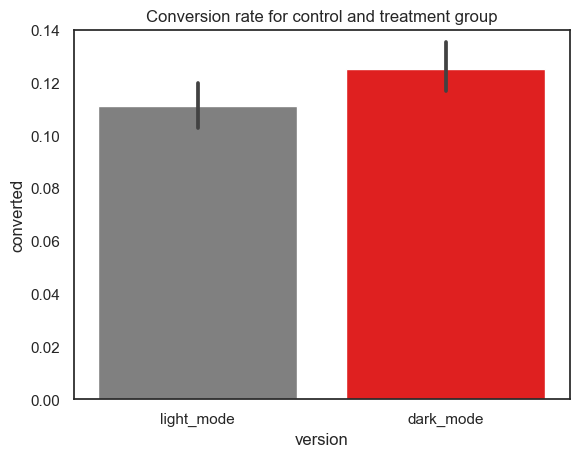

In [20]:
sns.barplot(x=df2['version'], y=df2['converted'], palette=['gray', 'red'])
plt.ylim(0, 0.14)
plt.title('Conversion rate for control and treatment group')
plt.show()

---


# 4. Testing the Hypothesis


We can now go ahead and calculate the p-value. 


<details>
    <summary>What is a p-value?</summary>
    
A p-value is the probability to observe a value as extreme as the observed value assuming that the null hypothesis is true.
    
In step 1, we set that we have a 95% level of confidence, which results in a level of significance of 5%. 

</details>


In [32]:
# Number of conversions
ctrl_conversion = df2[df2['group']=='control']['converted']
trt_conversion = df2[df2['group']=='treatment']['converted']
num_converted = [ctrl_conversion.sum(), trt_conversion.sum()]

# Numver of observations
n_ctrl = ctrl_conversion.count()
n_trt = trt_conversion.count()
nobs = [n_ctrl, n_trt]

# Test for proportions based on normal (z) test
zstat, pvalue = sms.proportions_ztest(num_converted, nobs, alternative='two-sided')
print(f'z-statistics: {zstat:.4f}', f'p-value: {pvalue:.4f}')

z-statistics: -2.1056 p-value: 0.0352


How to interpret a p-value?


| Values of p | Inference |
| --- | --- |
| p > 0.1 | No evidence against the null hypohesis|
| 0.05 < p < 0.10 | Weak evidence against the null hypohesis|
| 0.01 < p < 0.05 | Moderate evidence against the null hypohesis|
| 0.005 < p < 0.01 | Good evidence against the null hypohesis|
| 0.001 < p < 0.005 | Strong evidence against the null hypohesis|
| p < 0.001 | Very strong evidence against the null hypohesis|


From the result, the p-value is 0.0352, which is less than 0.05. This means that we have moderate evidence against the null hypothesis. 

In this case, we would reject the null hypothesis. This means that we **cannot say** that there is no difference in conversion rate between dark mode and light mode users. 

The team can definitely choose to implement a dark mode version of the blog, but can continue monitoring the conversion results as time goes by.


---


# Exercises

The following exercises are to practice the material we learned. The dataset used is related to campaign performance and looks to see which group, between **ad** and **PSA (Public Service Annoucement)**, contributes the best to the company's revenue.


In [22]:
# Downloading the dataset
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0K4XEN/marketing_AB.csv')
marketing = pd.read_csv('marketing_AB.csv', index_col='Unnamed: 0')
marketing.sample(5)

,user id,test group,converted,total ads,most ads day,most ads hour
486402,1580930,ad,False,7,Thursday,15
369151,1516084,ad,False,6,Sunday,22
386177,1429731,ad,False,2,Thursday,21
502023,1653715,ad,False,2,Sunday,10
59901,1094987,ad,True,42,Tuesday,18


### Exercise 1 - Formulate the hypothesis for this problem


$H_0$: The conversion rates of two populations of ad and PSA are the same. $p_1 = p_2$

$H_1$: The conversion rates of two populations of ad and PSA are **not** the same. $p_1 \neq p_2$

$\alpha = 0.05, \quad \text{confidence interval} = 95\%$


<details>
    <summary>Click here for Solution</summary>

Since we don't actually know which group (psa or ad) will perform better, this will be a two-sided test.
- Null hypothesis: The conversion rate for the two groups is the same $$H_0: p = p_0$$
- Alternative Hypothesis: The conversion rate for the two groups is **not** the same $$H_1: p \neq p_0$$
where $p$ is the conversion rate for the psa, and $p_0$ is the conversion rate for the ads

- Let's set a confidence interval of $95\%$, hence our level of significance will be $\alpha = 1 - 0.95 = 5\%$

</details>


### Exercise 2 - Collect and clean up the dataset


In [23]:
# Check null values
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [24]:
# Check duplicates of user id
duplicated = marketing.duplicated(subset='user id', keep=False)
df = marketing[~duplicated]    # No duplicates
df.tail(5)

,user id,test group,converted,total ads,most ads day,most ads hour
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23
588100,1237779,ad,False,1,Tuesday,23


### Exercise 3 - Given that the baseline conversion rate is 10%, and we expect the conversion rate to be 15%, find the sample size needed


In [27]:
# Get the effective sample size for z-test
effect_size = sms.proportion_effectsize(0.1, 0.15)
nobs1 = sms.NormalIndPower().solve_power(effect_size=effect_size, nobs1=None, ratio=1, alpha=0.05, power=0.8, alternative='two-sided')
nobs1 = ceil(nobs1)
nobs1

681

### Exercise 4 - Split the data into treatment and control groups


In [48]:
# 682 samples are needed from both groups
ad_df = df[df['test group']=='ad'].sample(nobs1, random_state=1234)
psa_df = df[df['test group']=='psa'].sample(nobs1, random_state=1234)

ad_converted = ad_df['converted'].sum()
psa_converted = psa_df['converted'].sum()
converted = [ad_converted, psa_converted]

ad_cnt = len(ad_df)
psa_cnt = len(psa_df)
counts = [ad_cnt, psa_cnt]

### Exercise 5 - Calculate the p-value


In [49]:
z_stat, p_val = sms.proportions_ztest(converted, counts, alternative='two-sided')
print(f'z-stat: {z_stat:.4f}, p-value: {p_val:.4f}')

z-stat: 1.3894, p-value: 0.1647


Based on the p-value > 0.05, it is not statistically significant to **reject the null hypothesis**. Thus, the population proportions are the same; there is **no difference in the effects of both ad and PSA**.